In superdense coding, we transmit classical bits by sending only one qubit! $ [qq] + [q] \geq [cc]$ (where $[qq]$ is a bell state that is used, but not actually "sent")

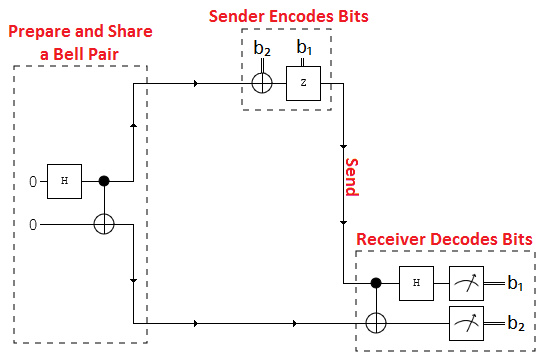

In [1]:
# Imports
import cirq

In [2]:
# Bitstring to store and visualise output
def bitstring(bits):
    return ''.join('1' if e else '0' for e in bits)

In [3]:
# Create quantum register
qreg = [cirq.LineQubit(x) for x in range(2)]
circ = cirq.Circuit()

Depending on what classical bits Alice wishes to send to bob, she will apply a different operator while encoding the bit. This is the library of information for each possible message

In [4]:
messageEncoding = {
    "00" : [],
    "01" : [cirq.X(qreg[0])],
    "10" : [cirq.Z(qreg[0])],
    "11" : [cirq.X(qreg[0]), cirq.Z(qreg[0])]
}

In [5]:
# Create bell pair

circ.append(cirq.H(qreg[0]))
circ.append(cirq.CNOT(qreg[0], qreg[1]))

In [6]:
# Pick a message to send
msg = "01"
print("Alice's sent message", msg)

Alice's sent message 01


In [7]:
# Apply correct gate to 0th bit
circ.append(messageEncoding[msg])

In [8]:
# Bob measures in the Bell basis
circ.append(cirq.CNOT(qreg[0], qreg[1]))
circ.append(cirq.H(qreg[0]))
circ.append([cirq.measure(qreg[0]), cirq.measure(qreg[1])])

In [9]:
print("\nCircuit:")
print(circ)


Circuit:
0: ───H───@───X───@───H───M───
          │       │
1: ───────X───────X───M───────


In [10]:
# Simulate circuit
sim = cirq.Simulator()
res = sim.run(circ, repetitions=1)


In [11]:
print("raw results: ", res)
print("\nBob's received message =", bitstring(res.measurements.values()))

raw results:  0=0
1=1

Bob's received message = 10
